# Customer Segmentation EDA

By Heba Masarwa

### Introduction

This exploratory data analysis investigates patterns in student behavior and engagement across different acquisition channels, drawing on onboarding survey responses, engagement metrics, and customer lifetime value data. Spanning diverse regions and marketing sources, the dataset enables us to examine how students interact with the platform based on how they first heard about it. The analysis focuses on identifying trends in study habits, marketing effectiveness, and user segmentation in preparation for a clustering model that will help uncover meaningful student groups and inform targeted marketing strategies.

### EDA

In [68]:
# Importing The Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sidetable

In [69]:
# Importing The Data
try:
    data = pd.read_csv('customer_segmentation_data.csv')
except:
    print('Error while loading the file')
    
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


- **Minutes Watched:** The number of minutes a student has watched since joining the program.
- **CLV:** The Customer Lifetime Value, or CLV, shows the total amount of revenue generated by that customer.
- **Region:** This is the geographical region where the student comes from.
- **Channel:** This is the channel through which the customer has learned about the 365 program

**The label mapping:**

Region:

- 0 → USA, Canada, United Kingdom, Australia

- 1 → Western Europe

- 2 → Rest of the World

Channel:

- 1 → Google

- 2 → Facebook

- 3 → YouTube

- 4 → LinkedIn

- 5 → Twitter

- 6 → Instagram

- 7 → Friend

- 8 → Other

In [70]:
data.tail()

,minutes_watched,CLV,region,channel
3829,11.0,79.0,0,3
3830,28.0,79.0,0,2
3831,57.0,36.0,2,2
3832,44.0,36.0,2,1
3833,NaN,79.0,0,3


In [71]:
data.shape

(3834, 4)

In [72]:
data.columns

Index(['minutes_watched', 'CLV', 'region', 'channel'], dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [74]:
data.stb.missing(style=True)

,missing,total,percent
minutes_watched,109,"3,834",2.84%
CLV,0,"3,834",0.00%
region,0,"3,834",0.00%
channel,0,"3,834",0.00%


The minutes_watched column is the only column with missing values in the dataset, and it will be addressed later on in the EDA.

In [75]:
print(data.duplicated().sum())

43


#### Data Cleaning

Visualizing the Missing Values

<Axes: >

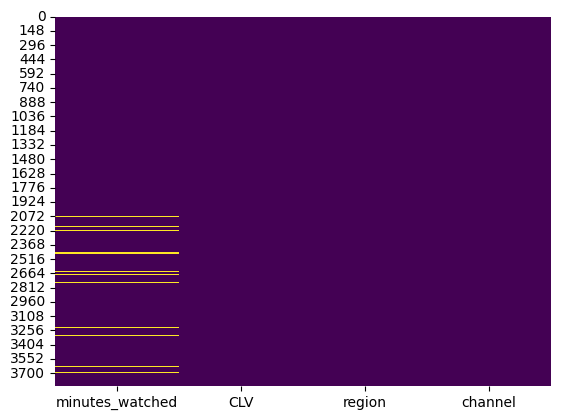

In [76]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')


Since the percentage of missing values is low (approximately 2%), we will fill them using the median value of the minutes_watched column.

In [77]:
median_mins = data['minutes_watched'].median()

data["minutes_watched"].fillna(median_mins, inplace = True)

data.stb.missing(style=True)

C:\Users\hebam\AppData\Local\Temp\ipykernel_28892\1665654051.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["minutes_watched"].fillna(median_mins, inplace = True)


,missing,total,percent
minutes_watched,0,"3,834",0.00%
CLV,0,"3,834",0.00%
region,0,"3,834",0.00%
channel,0,"3,834",0.00%


Since the duplicated rows make up only about 1.4% of the dataset, we will remove them to ensure data quality.



In [78]:
data.drop_duplicates(inplace=True)

In [79]:
print(data.duplicated().sum())

0


### Visualizations


#### How does the Customer Lifetime Value affect minutes watched? 

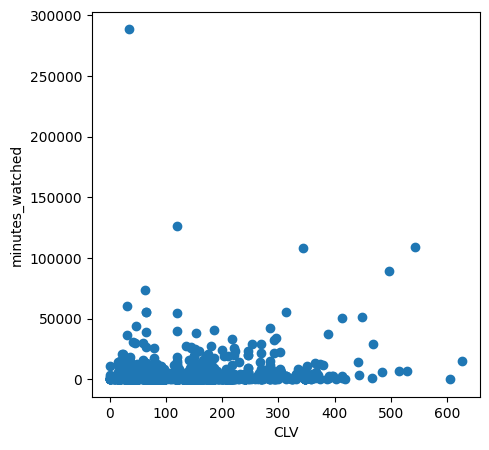

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(x='CLV',y='minutes_watched',data=data)
plt.xlabel('CLV')
plt.ylabel('minutes_watched')
plt.ticklabel_format(style='plain', axis='y')

We observe a slight linear relationship between minutes watched and CLV, but overall, the correlation doesn’t appear strong. To confirm, we will calculate their correlation coefficient.


In [81]:
correlation = data['minutes_watched'].corr(data['CLV'])
print("Correlation between minutes_watched and CLV:", round(correlation,2))

Correlation between minutes_watched and CLV: 0.11


The correlation coefficient between minutes watched and CLV is approximately 0.11, indicating a very weak positive linear relationship. This suggests that the amount of time students spend watching does not strongly predict their customer lifetime value.

#### Distribution for Region and Channel

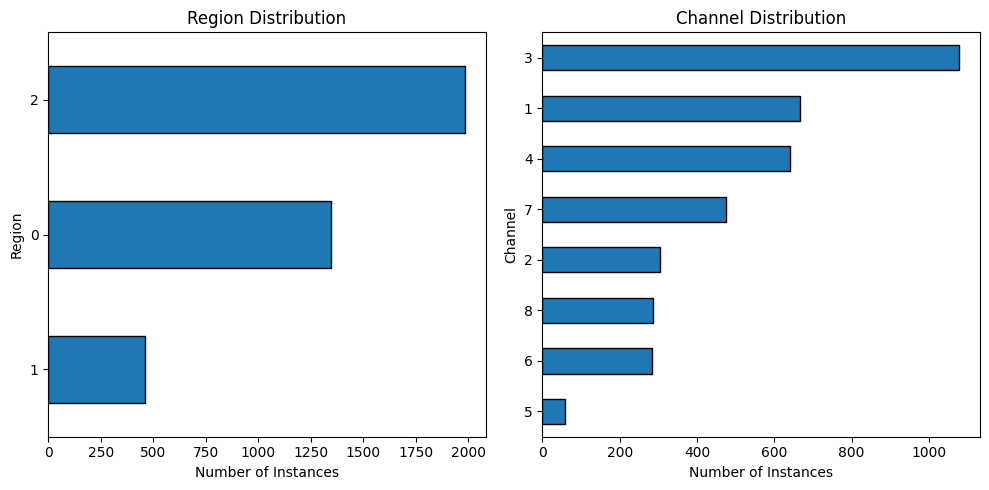

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

region_counts = data['region'].value_counts().sort_values(ascending=True)
region_counts.plot(kind='barh', edgecolor='black', ax=ax[0])
ax[0].set_title('Region Distribution')
ax[0].set_ylabel('Region')
ax[0].set_xlabel('Number of Instances')

channel_counts = data['channel'].value_counts().sort_values(ascending=True)
channel_counts.plot(kind='barh', edgecolor='black', ax=ax[1])
ax[1].set_title('Channel Distribution')
ax[1].set_ylabel('Channel')
ax[1].set_xlabel('Number of Instances')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

For the **Region distribution**, category 2 (Rest of the World) has the highest number of instances. It is followed by category 0 (USA, Canada, United Kingdom, Australia), and category 1 (Western Europe) has the lowest count.

For the **Channel distribution**, channel 3 (YouTube) leads by a large margin. It is followed by channel 1 (Google) and channel 4 (LinkedIn). Next are channels 7 (Friend), 2 (Facebook), 8 (Other), and 6 (Instagram), which all have similar counts. Channel 5 (Twitter) has the fewest instances.

#### Total Minutes Watched and Total CLV by Region

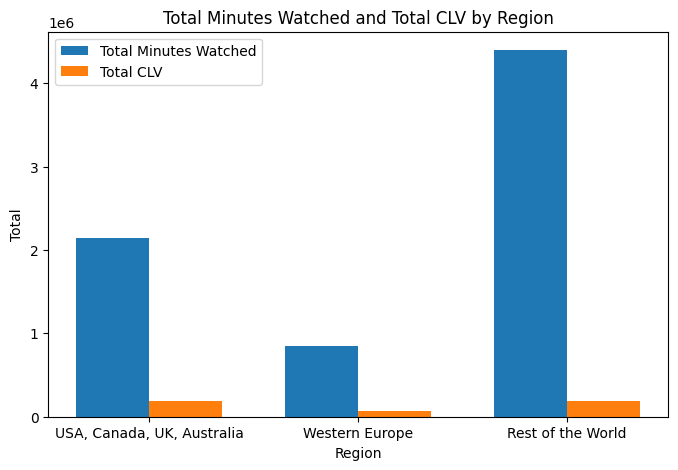

In [83]:
agg_data = data.groupby('region')[['minutes_watched', 'CLV']].sum()

x = np.arange(len(agg_data))  # positions for regions
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8,5))

bars1 = ax.bar(x - width/2, agg_data['minutes_watched'], width, label='Total Minutes Watched')
bars2 = ax.bar(x + width/2, agg_data['CLV'], width, label='Total CLV')

ax.set_xlabel('Region')
ax.set_ylabel('Total')
ax.set_title('Total Minutes Watched and Total CLV by Region')
ax.set_xticks(x)
ax.set_xticklabels(['USA, Canada, UK, Australia', 'Western Europe', 'Rest of the World'])
ax.legend()

plt.show()

The Rest of the World region has the highest total minutes watched compared to the other regions, while its CLV is similar to that of the USA, Canada, UK, and Australia region. Meanwhile, the Western Europe region has the lowest total minutes watched and CLV, which is unsurprising given it has the fewest users.

#### Total Minutes Watched and Total CLV by Channel

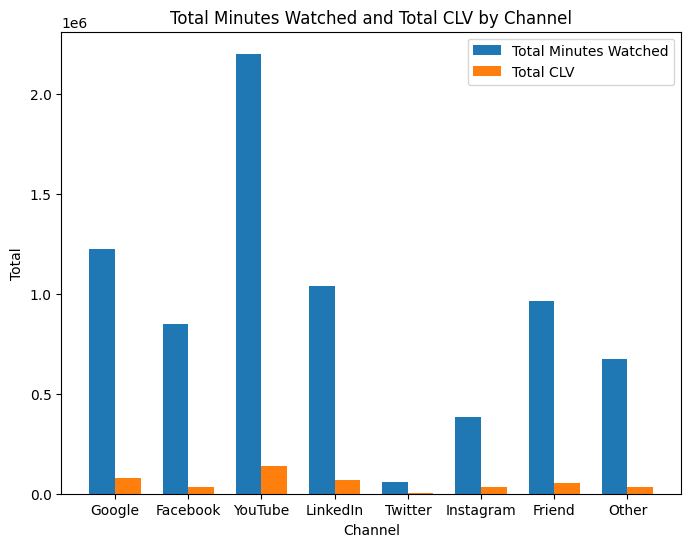

In [84]:
agg_data = data.groupby('channel')[['minutes_watched', 'CLV']].sum()

x = np.arange(len(agg_data)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(8,6))

bars1 = ax.bar(x - width/2, agg_data['minutes_watched'], width, label='Total Minutes Watched')
bars2 = ax.bar(x + width/2, agg_data['CLV'], width, label='Total CLV')

ax.set_xlabel('Channel')
ax.set_ylabel('Total')
ax.set_title('Total Minutes Watched and Total CLV by Channel')
ax.set_xticks(x)
ax.set_xticklabels(['Google', 'Facebook', 'YouTube', 'LinkedIn', 'Twitter','Instagram','Friend' ,'Other'])
ax.legend()

plt.show()

YouTube is again ahead of all other channels, which is expected since it provided the largest number of users. Google, LinkedIn, Friend, and Facebook follow in that order. Other and Instagram fall slightly behind these, while Twitter has the lowest values across all channels.

### One Hot Encoding

In this section we will prepare the data before the next step of model implementation.

We apply one-hot encoding before model implementation to convert categorical variables—such as region and channel—into a numerical format that machine learning algorithms can understand. Most models require numerical input, and one-hot encoding ensures that the categorical data is represented without implying any ordinal relationship between the categories. This step helps the model interpret the data accurately and perform better during training.

In [85]:
# Apply one-hot encoding to 'region' and 'channel' columns
data_encoded = pd.get_dummies(data, columns=['region', 'channel'], prefix=['region', 'channel'])
data_encoded = data_encoded.astype(int)

data_encoded.head()

,minutes_watched,CLV,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197,205,0,0,1,0,0,0,1,0,0,0,0
1,63,149,1,0,0,1,0,0,0,0,0,0,0
2,605,119,0,0,1,0,1,0,0,0,0,0,0
3,20,240,0,0,1,0,0,0,1,0,0,0,0
4,245,184,0,1,0,0,0,0,1,0,0,0,0


We will now export the cleaned and preprocessed dataset and proceed with the model implementation in a separate file to maintain a clear and organized workflow.

In [86]:
data_encoded.to_csv('cleaned_encoded_data.csv', index=False)